In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import scipy.stats as stats

In [2]:
from scipy.special import erf
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

In [3]:
list = np.random.randint(1, 1000, (1000))

<h3>Random Sampling</h3>

In [4]:
lst_rand_samp = random.sample(sorted(list), 50)

In [5]:
print(lst_rand_samp)
print(len(lst_rand_samp))

[238, 401, 628, 113, 501, 686, 390, 702, 777, 163, 905, 426, 317, 459, 592, 521, 960, 672, 852, 177, 37, 177, 147, 637, 186, 434, 127, 234, 76, 246, 143, 392, 736, 109, 932, 495, 569, 653, 96, 115, 628, 456, 830, 828, 966, 903, 148, 662, 468, 756]
50


In [6]:
lst_choice = np.random.choice(list, 50, replace = True)

In [7]:
print(lst_choice)
print(len(lst_choice))

[556 242 263 586 610 989 601 198 171 275  24 487 938   6 885 817 566 470
 668 942   5 967 838 535  64 165 903 312 218 653 174 138 909 605 472 510
  18 147 424  24  37 346 437 687 885 445 347 365 893  43]
50


In [8]:
h = np.random.randn(50)

<Axes: ylabel='Count'>

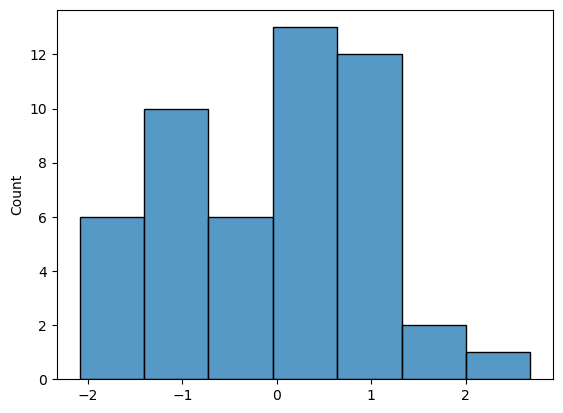

In [9]:
sns.histplot(h)

<h2>Hypothesis Testing</h2>

<h4>Z - Test</h4>

In [10]:
data = np.array(np.random.RandomState(8).randint(1, 1000, 500))

In [11]:
alpha = 0.05  # Significance level
population_mean = np.mean(data)
print('Population Mean :', population_mean)
population_std = np.std(data)
print('Population Std  :', population_std)

Population Mean : 502.75
Population Std  : 292.8194930328239


In [12]:
sample_data = np.random.RandomState(8).choice(data, 50)

sample_size = len(sample_data)
print('Sample Size N :', sample_size)

sample_data_mean = np.mean(sample_data)
print('Sample Mean   :', sample_data_mean)

Sample Size N : 50
Sample Mean   : 491.26


In [13]:
standard_error = population_std / np.sqrt(sample_size)   # Standard error (standard_error = standard_deviation / square_root(sample_size))
print('Standard error :', standard_error)

Standard error : 41.41092983742336


In [14]:
z_score = (sample_data_mean - population_mean) / standard_error
print('z Score :', z_score)

p_value = 2 * (1 - 0.5 * (1 + erf(abs(z_score) / np.sqrt(2))))
print('P Value :', p_value)

z Score : -0.27746298006610837
P Value : 0.7814246279226427


In [15]:
if p_value < alpha:
    print("Reject the null hypothesis (The sample mean is significantly different from the population mean).")
else:
    print("Fail to reject the null hypothesis (The sample mean is not significantly different from the population mean).")

Fail to reject the null hypothesis (The sample mean is not significantly different from the population mean).


In [16]:
mean_iq = 110
sd_iq = 15 / math.sqrt(50)
alpha = 0.05
null_mean = 100
data = sd_iq * randn(50) + mean_iq

print('Mean               :', np.mean(data))
print('Standard Deviation :', np.std(data))

ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')

if(p_value < alpha):
    print("\nReject Null Hypothesis")
else:
    print("\nFail to Reject NUll Hypothesis")

Mean               : 110.11629480857871
Standard Deviation : 2.202935292564213

Reject Null Hypothesis


<h4>T - Test</h4>

In [17]:
pop_mean = 70
sam_mean = 75
sam_std = 27
sam_size = 30
alpha = 0.05

In [18]:
df = sam_size - 1   # degree of freedom

In [19]:
t_stat = (sam_mean - pop_mean) / (sam_std / np.sqrt(sam_size))
print('T-Statistic      :', t_stat)

critical_t = stats.t.ppf(1 - alpha, df)
print('Critical T Value :', critical_t)

p_value = 1 - stats.t.cdf(t_stat, df)
print('P Value          :', p_value)

T-Statistic      : 1.0143010324169741
Critical T Value : 1.6991270265334972
P Value          : 0.15941369166237795


In [20]:
if t_stat > critical_t :
    print("""There is a significant difference in weight before and after the camp. 
    The fitness camp had an effect.""")
else :
    print("""There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.""")

There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.


<h4>Chi Square Test for Feature Selection</h4>

In [21]:
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [22]:
data = load_iris()
X = data.data
y = data.target

In [26]:
model = SelectKBest(score_func = chi2, k = 2)  # k = number of feature we want after selection

In [27]:
dtf = model.fit_transform(X, y)

In [28]:
print('Original Features             :', X.shape[1])
print('Features after Chi2 Selection :', dtf.shape[1])

Original Features             : 4
Features after Chi2 Selection : 2
